# Binance Accounts Management Reports

<center><img src=https://seeklogo.com/images/B/binance-coin-bnb-logo-97F9D55608-seeklogo.com.png width="100"</center> 

## Welcome
This document is the application document to run get the Binance Datas and run Binance Management Reports.

This document allow you to download your datas in your computer locally.

You can run this document from Google colab or Jupyter Notebook.
Setup: check below information
Usage : connect local environment, run environment, settings and document

Enjoy

In [ ]:
#@title Last Update
# %%html
# <marquee style='width: 100%; color: blue;'><b>🚂_/👨🏽‍✈️Nico/_🚋_/V1.0.0 - 29-09-2022/_🚋_</b></marquee>

## Table of Content

- Welcome
- Requirements
  - Localhost
  - Virtual Env
  - Jupyter
  
- Setup
  - Workstation infos
  - Programs
    - Installation
    - Start
    - Control Versions
    - Environment
    - Variables & Aliases
       - Path


- Document chapters


# Requirements
<center><img src=https://cdn-icons-png.flaticon.com/512/4901/4901662.png width="25"</center>

This requirements are set for the current documents deployment.
___
- Internet Access
- Administrative rights
- Binance Account
- Sub Accounts (optionnal)
- API Account(s) : "read" access rights minimum
- Make sure your computer has the right time !

-Try to set the path in Windows `My Documnent/Trading/Trades-Workspace/`.

-Try to set the path in Linux `home/Trades/Trades-Workspace/`.


Localhost :
- Python v 3.9 : 
> - Windows : `winget install -e --id Python.Python.3`
> - Linux : `sudo apt-get python3`

>  - option : inspiration Path Python Windows: `C:\Users\<your_username>\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.<version>\LocalCache\local-packages\Python3<version>\Scripts ` 

>>Python's Modules :
>>>- apt Update : `sudo apt-get update`
- request : `pip install request`
- datetime : `pip install datetime`
- pandas : `pip install pandas`
- matplotlib : `pip install matplotlib`


Optional :
- Transaction Analisys : `pip install ta`
- ciso8601 : `pip install ciso8601`


>>Jupyter Server :
- Jupyter installation : `pip3 install Jupyter` 
- Upgrade Jupyter/Googl Colab : `pip3 install --upgrade jupyter_http_over_ws>=0.0.7 && jupyter serverextension enable --py jupyter_http_over_ws`


Create manually
- Sub-Folders :
>- /env
>- /database
>- /database/ftx/reports

- Files :
>- /env/Login.env
>- /env/Sub Account API keys file : 
>>- filename  : `<your-sub-account-name>.env` 
>>>- 1st line :`<your_api_key>`
>>>- 2nd line :`<your_api_secret>`


# Document Setup
<center><img src=https://icon-library.com/images/easy-icon-png/easy-icon-png-0.jpg width="50"</center>

#### - Easy setup :

Start a Python's Virtual-env dedicated to the process, this allow you to run the kernel in a separate environnement.

copy this shell command in a `your-venv -startup.sh`, and run it
- * `sudo` might be required to allow some `ftx python client` usage, as far a solution is found it will be change.


- `your-venv-startup.sh` sample Linux file

```shell
# !/bin/bash
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      1. Python
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

apt-get update -y
#apt-get install python3.8

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      2. Pip3
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

apt-get -y install python3-pip

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      4. VIRTUAL ENV
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

apt-get -y update
apt-get -y upgrade
apt-get -y install python3

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      5. UPGRADE PIP
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# -H pip3 install --upgrade pip
apt-get update -y

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      6. Install VirtualEnv
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

pip3 install virtualenv -y

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      7. Deploy VirtualEnv
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# ftx client 3.8
python3 -m venv "My-TradeEnv"

#chmod +x "My-TradeEnv"
#sudo chmod -R a+rwx My-TradeEnv

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      8. Launch VirtualEnv
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

source My-TradeEnv/bin/activate

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo      9. Install Jupyter
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# **** pip as Non root ****
pip3 install jupyter

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo   10. upgrade Jupyter Srvr Ext
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

pip install --upgrade jupyter_http_over_ws>=0.0.7 && jupyter serverextension enable --py jupyter_http_over_ws

# sudo chmod +x '=0.0.7'

echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
echo   11.Launch Jupyter Web Srvr port: 8183
echo ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Option: remove `--no-browser`, `--allow-root...--NotebookApp...` to use jupyter locally
jupyter notebook --allow-root --NotebookApp.allow_origin='https://colab.research.google.com' --port=8183 --NotebookApp.port_retries=0 --no-browser
export JUPYTER_TMP_PID=$!

```



In [ ]:
#@title Startup
# %%html
# <details>
# <summary>Startup</summary>

- Google Colab option : click connect local environment : paste your Jupyter's `localhost` Path  

### - Modules python installation :
remove `#` to run the cell
<center><img src=https://cdn-icons-png.flaticon.com/512/1313/1313837.png width="50"</center>

In [ ]:
#@title - upgrade pip : `sudo pip install --upgrade pip`
!pip3 install --upgrade pip

In [ ]:
#@title - Module : `pip install requests`
!pip3 install requests

In [ ]:
#@title - Module : `pip install datetime`
# !pip3 install datetime

In [ ]:
#@title - Intalls Module :`pip install pandas`
!pip3 install pandas

In [ ]:
#@title - Install Module : `pip install matplotlib`
!pip install matplotlib

## **Environment**
<center><img src=https://cdn-icons-png.flaticon.com/512/1461/1461141.png width="50"</center>

In [ ]:
#@title - Check OS :
import platform

if platform.system() == 'Windows':
    print(f'Your Computer runs :', platform.system())
    !set PATH os.path.dirname(sys.executable)
else:
    print("it might be a Linux")


### Variables & Aliases

In [ ]:
#@title - who am I :
import os
from os.path import expanduser

if platform.system() == 'Windows':
  home_directory = expanduser("~")
  print(f'Your local path :', home_directory)

else:
  home_directory = expanduser("~")
# TBC
  print(os.path.expanduser('~'))
  print(os.environ['HOME'])
  # print('Where am I ? : ')
  # !echo $HOME

  print('Who am I ? : ')
  !whoami

In [ ]:
#@title - set Variables :

USER_FOLDER = home_directory                        # current user drive
PROJECT_FOLDER = 'Binance-Accounts-Management-Reports'  # Not too long
exchange = 'binance'

### - Path

In [ ]:
#@title - Create the path :

import os
from os.path import expanduser

if platform.system() == 'Windows':
  #home_path = "\home\\" + USER_FOLDER
  home_path = USER_FOLDER
  trades_path = USER_FOLDER + "\Documents\Trading\Trades-Workspace\\"
  working_path =  trades_path + PROJECT_FOLDER + "\\"
  reports_path =  working_path + "database" + "\\" + exchange + "\\" + "reports" + "\\" 
  env_path =  working_path + "env" "\\"

else:
  home_path = home_directory
  trades_path = home_path + "/Documents/Trades/Trades-Workspace/"
  working_path =  trades_path + PROJECT_FOLDER + "/"
  reports_path =  working_path + "database/" + exchange + "/reports" + "/"
  env_path =  working_path + "env" + "/"


#%whos

print(f'reports', reports_path)

### - Directories

#### - Directories Linux

In [ ]:
#@title Create local Directory
%cd $trades_path
!mkdir $PROJECT_FOLDER
%cd $PROJECT_FOLDER
%bookmark working_path $working_path

#del $trade-workspace

In [ ]:
#@title Go to working directory
%cd ~
%cd working_path
!dir

### - Where Am I

In [ ]:
#@title - Where Am I
%pwd

In [ ]:
# #@title  End Setup
# %%html
# </details>

# Document

1. - Install Python & Jupiter, or Conda, or Venv.
2. - create documents processes folders & set your personnal paramters by changing the settings 
3. - connect the document to your venv
4. - run the document & wait
5. - Enjoy your Coins !


- Sub-Accounts
- create a file `/env/SUBList.csv`
- set your sub accounts names.

Sample:
Columns Name :
- accountName,
- PAIR_NAME
- PAIR_SYMBOL
- FIATSYMBOL
- CRYPTOSYMBOL

Optional info:
>- SUB_ACC_NAME     <!-- # Options -->
- LONG_TRSLD
- SHORT_TRSLD
- SHORT_MARKUP
- LONG_MARKUP 
- SHORT_PRCT
- LONG_PRCT

Mandatroy
- EXCHANGE

## 1. Load Settings :
<center><img src=https://www.pngmart.com/files/7/Backup-PNG-Transparent-Image.png width="50"</center>

#### Working Directory

In [ ]:
#@title Create working directory
# # !rmdir 1
%cd working_path
# !mkdir 1
# !sudo chmod +x 1

In [ ]:
#@title Go to woking directory
%cd working_path
# cd 1
# !dir "%cd%"
!dir

### Context



### 1.1. - Load Parameters :
<center><img src=https://icons-for-free.com/iconfiles/png/512/parameters+icon-1320184417760430130.png width="50"</center>

In [ ]:
#@title - Binance Read Account's credentials:
f=open(env_path+"ReadB.env","r")
lines=f.read().splitlines()
READB_API_KEY=lines[0]
READB_API_SECRET=lines[1]
f.close()

In [ ]:
#@title - Constant Parameters :

# General
START_DATE = '2022-06-01'
START_DATE_CH = "01 june 2022"
TF = "1d"
TFH = "1h"

# SAMPLE PAIR
PAIR_NAME = "ATOMUSDT"
PAIR_SYMBOL = "ATOM/USDT"
FIATSYMBOL = "BUSD"
CRYPTOSYMBOL = "ATOM"
#SUB_ACC_NAME = 'Trix_ATOM-USDT'
accountName = ''

# API
SUB_API_KEY = READB_API_KEY
SUB_API_SECRET = READB_API_SECRET

print ("GENERAL")
# print ("pair : " + PAIR_NAME)
print ("Start date : " + START_DATE)
print ("Start date Char : " + START_DATE_CH)

## 2. - Binance Stock Analyse :
<center><img src=https://www.pngmart.com/files/7/Stocks-PNG-Transparent-Image.png width="130"</center>

#### Working Directory
<center><img src=https://cdn3.iconfinder.com/data/icons/seo-marketing-filled-line/88/folder_share_network_root_directory-512.png width="40"</center>

In [ ]:
#@title Create working directory
%cd working_path
!mkdir database
%cd database
!mkdir binance
%cd binance
!mkdir reports

In [ ]:
#@title Go to woking directory
%cd working_path
!dir

#### 2.1. - Accounts Stock Balance :



<center><img src=https://www.pngplay.com/wp-content/uploads/6/Balance-Vector-Background-PNG-Image.png width="55"</center>

##### 2.1.1 - Fiat & Spot Balance : 
<center><img src=https://cdn-icons-png.flaticon.com/512/1006/1006547.png width="40"</center>

###### 2.1.1.1 - Load Fiat & Spot Balance : 
<center><img src=https://www.pngplay.com/wp-content/uploads/6/Balance-Vector-Transparent-Background.png width="30"</center>

In [ ]:
#@title - Stock Analysis : Get tickers
from urllib.request import urlopen
from datetime import datetime
import pandas as pd

currentDateTime = datetime.now().strftime("%y%m%d")

if os.path.exists(f'{reports_path}Bin-Tic-{currentDateTime}.csv'):
    os.remove(f'{reports_path}Bin-Tic-{currentDateTime}.csv')
else:
    print("Can not delete the file as it doesn't exists")

response = urlopen("https://api.binance.com/api/v3/ticker/price")
json_data = response.read().decode('utf-8', 'replace')

df_Tic = pd.read_json(json_data)
df_Tic.rename(columns={'symbol':'PAIR_NAME', 'price':'Price'}, inplace=True)

# ## Export csv
df_Tic.to_csv(f'{reports_path}Bin-Tic-{currentDateTime}.csv'\
      , index = False, mode='a', header=True, encoding='utf-8')

print(f'export :')
!dir {reports_path}Bin-Tic-{currentDateTime}.csv

In [ ]:
#@title - Stock Analysis : Get all Pair
import requests
import json
import hmac
import time
from datetime import datetime
import pandas as pd
import hashlib
from urllib.parse import urlencode

KEY = READB_API_KEY
SECRET = READB_API_SECRET


BASE_URL = "https://api.binance.com"  # production base url
# BASE_URL = 'https://testnet.binance.vision' # testnet base url


currentDateTime = datetime.now().strftime("%y%m%d")

if os.path.exists(f'{reports_path}Bin-Pair.csv'):
    os.remove(f'{reports_path}Bin-Pair.csv')
else:
    print("Can not delete the file as it doesn't exists")



""" ======  begin of functions, you don't need to touch ====== """


def hashing(query_string):
    return hmac.new(
        SECRET.encode("utf-8"), query_string.encode("utf-8"), hashlib.sha256
    ).hexdigest()


def get_timestamp():
    return int(time.time() * 1000)


def dispatch_request(http_method):
    session = requests.Session()
    session.headers.update(
        {"Content-Type": "application/json;charset=utf-8", "X-MBX-APIKEY": KEY}
    )
    return {
        "GET": session.get,
        "DELETE": session.delete,
        "PUT": session.put,
        "POST": session.post,
    }.get(http_method, "GET")


# used for sending request requires the signature
def send_signed_request(http_method, url_path, payload={}):
    query_string = urlencode(payload, True)
    if query_string:
        query_string = "{}&timestamp={}".format(query_string, get_timestamp())
    else:
        query_string = "timestamp={}".format(get_timestamp())

    url = (
        BASE_URL + url_path + "?" + query_string + "&signature=" + hashing(query_string)
    )
    print("{} {}".format(http_method, url))
    params = {"url": url, "params": {}}
    response = dispatch_request(http_method)(**params)
    return response.json()


# used for sending public data request
def send_public_request(url_path, payload={}):
    query_string = urlencode(payload, True)
    url = BASE_URL + url_path
    if query_string:
        url = url + "?" + query_string
    print("{}".format(url))
    response = dispatch_request("GET")(url=url)
    return response.json()


""" ======  end of functions ====== """

### USER_DATA endpoints, call send_signed_request #####
response = send_signed_request("GET", "/sapi/v1/margin/isolated/allPairs")
#print(response)

## Result    
df_pair = pd.DataFrame.from_records(response)
df_binpair = df_pair 
df_binpair
df_binpair.rename(columns={'symbol':'PAIR_NAME', 'base':'Symbol', 'quote':'FIATSYMBOL'}, inplace=True)

# # ## Export csv
df_binpair\
.to_csv(f'{reports_path}Bin-Pair.csv'\
      , index = False, mode='a', header=True, encoding='utf-8')

# print(f'export :')
!dir {reports_path}Bin-Pair-{currentDateTime}.csv

In [ ]:
#@title - Stock Analysis : Fiat & Spot
import requests
import json
import hmac
import time
from datetime import datetime
import pandas as pd
import hashlib
from urllib.parse import urlencode

KEY = READB_API_KEY
SECRET = READB_API_SECRET


BASE_URL = "https://api.binance.com"  # production base url
# BASE_URL = 'https://testnet.binance.vision' # testnet base url


currentDateTime = datetime.now().strftime("%y%m%d")

if os.path.exists(f'{reports_path}Bin-MA-{currentDateTime}.csv'):
    os.remove(f'{reports_path}Bin-MA-{currentDateTime}.csv')
else:
    print("Can not delete the file as it doesn't exists")



""" ======  begin of functions, you don't need to touch ====== """


def hashing(query_string):
    return hmac.new(
        SECRET.encode("utf-8"), query_string.encode("utf-8"), hashlib.sha256
    ).hexdigest()


def get_timestamp():
    return int(time.time() * 1000)


def dispatch_request(http_method):
    session = requests.Session()
    session.headers.update(
        {"Content-Type": "application/json;charset=utf-8", "X-MBX-APIKEY": KEY}
    )
    return {
        "GET": session.get,
        "DELETE": session.delete,
        "PUT": session.put,
        "POST": session.post,
    }.get(http_method, "GET")


# used for sending request requires the signature
def send_signed_request(http_method, url_path, payload={}):
    query_string = urlencode(payload, True)
    if query_string:
        query_string = "{}&timestamp={}".format(query_string, get_timestamp())
    else:
        query_string = "timestamp={}".format(get_timestamp())

    url = (
        BASE_URL + url_path + "?" + query_string + "&signature=" + hashing(query_string)
    )
    print("{} {}".format(http_method, url))
    params = {"url": url, "params": {}}
    response = dispatch_request(http_method)(**params)
    return response.json()


# used for sending public data request
def send_public_request(url_path, payload={}):
    query_string = urlencode(payload, True)
    url = BASE_URL + url_path
    if query_string:
        url = url + "?" + query_string
    print("{}".format(url))
    response = dispatch_request("GET")(url=url)
    return response.json()


""" ======  end of functions ====== """

### USER_DATA endpoints, call send_signed_request #####
response = send_signed_request("GET", "/sapi/v1/capital/config/getall")
#print(response)

## Result    
df_MA = pd.DataFrame.from_records(response)
#df_binMA = df_MA.loc[df_MA['coin'] == 'BUSD' ]
df_binMA = df_MA 
df_binMA['Quantity'] = df_MA['free'].astype(float) + df_MA['locked'].astype(float)
df_binMA = df_binMA.loc[df_MA['Quantity'] > 0 ]
#df_binMA.reset_index(inplace=True)
df_binMA[['accountName']] = 'Main Account'
df_binMA.rename(columns={'coin':'Symbol'}, inplace=True)

df_binTic = pd.read_csv(f'{reports_path}Bin-Tic-{currentDateTime}.csv', header=0, encoding='utf-8')
df_binPair = pd.read_csv(f'{reports_path}Bin-Pair.csv', header=0, encoding='utf-8')
df_binPair = df_binPair[df_binPair['FIATSYMBOL'] == FIATSYMBOL]

# on PAIR
df_binTic = pd.merge(df_binPair, df_binTic, how='left', on='PAIR_NAME')
df_binTic = df_binTic[['PAIR_NAME', 'Symbol', 'FIATSYMBOL', 'Price']]
df_binMA = pd.merge(df_binMA, df_binTic, how='outer', on='Symbol')
df_binMA =  df_binMA.fillna(value={'Quantity':0, 'Price':1})
df_binMA['Stock-value'] = df_binMA['Quantity'] * df_binMA['Price']

# # ## Export csv
df_binMA\
.to_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv'\
      , index = False, mode='a', header=True, encoding='utf-8')

print(f'export :')
!dir {reports_path}Bin-MA-{currentDateTime}.csv

#df_binMA = df_binMA.loc[df_binMA['Symbol'] == 'BUSD' ]
#df_binMA

In [ ]:
#@title - Coins / Fiat & Spot :
import pandas as pd
from datetime import datetime


#names =['coin', 'depositAllEnable', 'withdrawAllEnable', 'name', 'free', 'locked'\
#, 'freeze', 'withdrawing', 'ipoing', 'ipoable', 'storage', 'isLegalMoney', 'trading', 'networkList', 'Total']

currentDateTime = datetime.now().strftime("%y%m%d")
df_MA = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_MA = df_MA.sort_values(by=['Stock-value'],ascending=False)
df_MA = df_MA[df_MA['Stock-value'] > 0.0]
df_MA.reset_index(inplace=True)


df_MA = df_MA[['Symbol', 'Quantity', 'Price', 'Stock-value']].round({'Quantity':2, 'Price':2, 'Stock-value':2})
df_MA

In [ ]:
#@title - Total Main Account Coins / Main Accounts :
import pandas as pd
from datetime import datetime

currentDateTime = datetime.now().strftime("%y%m%d")
df_MA = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_MA.rename(columns={'coin':'Symbol', 'free':'Quantity', 'Total':'Stock-value'}, inplace=True)
df_MA = df_MA.sort_values(by=['Stock-value'],ascending=False)
df_MA = df_MA[df_MA['Stock-value'] > 0.0]
df_MA.reset_index(inplace=True)

sum_MA = df_MA['Stock-value'].sum()
print(f'Total Fiat & Spot / {FIATSYMBOL} :', round(sum_MA,2))

###### 2.1.1.2 - Plot Fiat & Spot Balance : 

<center><img src=https://www.pngplay.com/wp-content/uploads/7/Business-Growth-Chart-PNG-Clipart-Background.png width="50"</center>

In [ ]:
#@title - Symbol Balance Division : Fiat & Spot
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

currentDateTime = datetime.now().strftime("%y%m%d")
df_MA = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_MA.rename(columns={'coin':'Symbol', 'free':'Quantity', 'Total':'Stock-value'}, inplace=True)
df_MA = df_MA.sort_values(by=['Stock-value'],ascending=False)
df_MA = df_MA[df_MA['Stock-value'] > 0.0]
df_MA.reset_index(inplace=True)

df_MA = df_MA[df_MA['Stock-value'] > 10]
labels = df_MA['Symbol'].tolist()

#df_MA.plot(label='Stock Analysis', kind='pie', autopct='%1.0f%%', y='Stock-value', labels=labels, shadow=True, startangle=90, figsize=(7, 7))
df_MA.plot(label='Binance Fiat & Spot Stock Analysis', kind='pie', autopct='%1.0f%%', y='Stock-value', labels=labels, shadow=True, startangle=90)

plt.title('Fiat & Spot Division',x=0.5, y=0.5)
plt.axis('equal')
plt.legend().remove()
plt.show()

In [ ]:
#@title - Symbol Balance Values : Fiat & Spot
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

currentDateTime = datetime.now().strftime("%y%m%d")
df_MA = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_MA.rename(columns={'coin':'Symbol', 'free':'Quantity', 'Total':'Stock-value'}, inplace=True)
df_MA = df_MA.sort_values(by=['Stock-value'],ascending=False)
df_MA = df_MA[df_MA['Stock-value'] > 0.0]
df_MA.reset_index(inplace=True)



df_MA = df_MA[df_MA['Stock-value'] > 10]
values = round(df_MA['Stock-value'],2).tolist()
bar_labels = df_MA['Symbol'].tolist()
coin = df_MA['Symbol'].tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig, ax = plt.subplots()

data_color = [x / max(values) for x in values]
bar_colors = plt.cm.rainbow(data_color)

ax.bar(coin, values, label=bar_labels, color=bar_colors)


ax.set_ylabel('coin')
ax.set_title('Fiat & Spot Values')
# ax.legend(title='Coin')

# calling the function to add value labels
addlabels(coin, values)

plt.rcParams["figure.figsize"] = (30, 10)
plt.autoscale()
plt.xlabel('values')


plt.show()

##### 2.1.2 -  Earn Balances :
<center><img 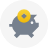 width="50"</center>

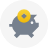

###### - Coins / Spot & Earn Balances : 
<center><img src=https://pics.clipartpng.com/Gold_Coins_PNG_Clipart-664.png width="50"</center>

###### 2.1.2.1 - Load Earn Balances : 
<center><img src=https://www.freeiconspng.com/uploads/libra-png-10.png width="50"</center>

In [ ]:
#@title - Get : Simple Earn flexible Balance
import requests
import json
import hmac
import time
from datetime import datetime
import pandas as pd
import hashlib
from urllib.parse import urlencode

KEY = READB_API_KEY
SECRET = READB_API_SECRET
BASE_URL = "https://api.binance.com"  # production base url
# BASE_URL = 'https://testnet.binance.vision' # testnet base url


currentDateTime = datetime.now().strftime("%y%m%d")

if os.path.exists(f'{reports_path}Bin-flex-{currentDateTime}.csv'):
    os.remove(f'{reports_path}Bin-flex-{currentDateTime}.csv')
else:
    print("Can not delete the file as it doesn't exists")



""" ======  begin of functions, you don't need to touch ====== """


def hashing(query_string):
    return hmac.new(
        SECRET.encode("utf-8"), query_string.encode("utf-8"), hashlib.sha256
    ).hexdigest()


def get_timestamp():
    return int(time.time() * 1000)


def dispatch_request(http_method):
    session = requests.Session()
    session.headers.update(
        {"Content-Type": "application/json;charset=utf-8", "X-MBX-APIKEY": KEY}
    )
    return {
        "GET": session.get,
        "DELETE": session.delete,
        "PUT": session.put,
        "POST": session.post,
    }.get(http_method, "GET")


# used for sending request requires the signature
def send_signed_request(http_method, url_path, payload={}):
    query_string = urlencode(payload, True)
    if query_string:
        query_string = "{}&timestamp={}".format(query_string, get_timestamp())
    else:
        query_string = "timestamp={}".format(get_timestamp())

    url = (
        BASE_URL + url_path + "?" + query_string + "&signature=" + hashing(query_string)
    )
    print("{} {}".format(http_method, url))
    params = {"url": url, "params": {}}
    response = dispatch_request(http_method)(**params)
    return response.json()


# used for sending public data request
def send_public_request(url_path, payload={}):
    query_string = urlencode(payload, True)
    url = BASE_URL + url_path
    if query_string:
        url = url + "?" + query_string
    print("{}".format(url))
    response = dispatch_request("GET")(url=url)
    return response.json()


""" ======  end of functions ====== """

### USER_DATA endpoints, call send_signed_request #####
# get account informtion
# if you can see the account details, then the API key/secret is correct
response = send_signed_request("GET", "/sapi/v1/lending/daily/token/position")
#print(response)


## Result    
df_flex = pd.DataFrame.from_records(response)
 #df_binMA = df_MA.loc[df_MA['coin'] == 'BUSD' ]
df_binflex = df_flex 
# df_binflex['Total'] = df_flex['free'].astype(float) + df_MA['locked'].astype(float)
df_binflex = df_binflex.loc[df_binflex['totalAmount'].astype(float) > 0 ]
# #df_binMA.reset_index(inplace=True)
df_binflex[['accountName']] = 'Simple-Earn-Flexible'
df_binflex.rename(columns={'asset':'Symbol','totalAmount':'Quantity'}, inplace=True)

## Load Price
df_binTic = pd.read_csv(f'{reports_path}Bin-Tic-{currentDateTime}.csv', header=0, encoding='utf-8')
df_binPair = pd.read_csv(f'{reports_path}Bin-Pair.csv', header=0, encoding='utf-8')
df_binPair = df_binPair[df_binPair['FIATSYMBOL'] == FIATSYMBOL]

## on PAIR
df_binTic = pd.merge(df_binPair, df_binTic, how='left', on='PAIR_NAME')
df_binTic = df_binTic[['PAIR_NAME', 'Symbol', 'FIATSYMBOL', 'Price']]

df_binflex = pd.merge(df_binflex, df_binTic, how='outer', on='Symbol')
df_binflex =  df_binflex.fillna(value={'Quantity':0, 'Price':1})
df_binflex['Stock-value'] = df_binflex['Quantity'].astype(float) * df_binflex['Price']

# # asset,productId,productName,dailyInterestRate,annualInterestRate,avgAnnualInterestRate,totalAmount,lockedAmount,freeAmount,freezeAmount,totalInterest,canRedeem,redeemingAmount,todayPurchasedAmount,tierAnnualInterestRate


# # # ## Export csv
df_binflex\
.to_csv(f'{reports_path}Bin-flex-{currentDateTime}.csv'\
      , index = False, mode='a', header=True, encoding='utf-8')


print(f'export :')
!dir {reports_path}Bin-flex-{currentDateTime}.csv

#df_binflex = df_binflex.loc[df_binflex['Symbol'] == 'ETH' ]
#df_binflex[['Symbol', 'Quantity', 'Price', 'Stock-value']]

In [ ]:
#@title - Sum Simple Earn Flexible :
import pandas as pd
from datetime import datetime

currentDateTime = datetime.now().strftime("%y%m%d")
df_binflex = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_binflex.rename(columns={'coin':'Symbol', 'free':'Quantity', 'Total':'Stock-value'}, inplace=True)
df_binflex = df_binflex.sort_values(by=['Stock-value'],ascending=False)
df_binflex = df_binflex[df_binflex['Stock-value'] > 0.0]
df_binflex.reset_index(inplace=True)

TotalSub = df_binflex['Stock-value'].sum()

print(f'Total :', round(TotalSub,2))

In [ ]:
#@title - Symbol Groups values / Simple earn flexible :
currentDateTime = datetime.now().strftime("%y%m%d")

df_binflex = pd.read_csv(f'{reports_path}Bin-flex-{currentDateTime}.csv', header=0, encoding='utf-8')
df_binflex.rename(columns={'asset':'Symbol', 'totalAmount':'Quantity'}, inplace=True)
df_binflex = df_binflex.sort_values(by=['Quantity'],ascending=False)
df_binflex.reset_index(inplace=True)


symbolGroup = df_binflex[['Symbol', 'accountName', 'Quantity','Stock-value']]\
.groupby(['Symbol']).sum(numeric_only=True)\
.round({'Quantity':2})

symbolGroup['%'] = 100 * symbolGroup['Stock-value'] / symbolGroup['Stock-value'].sum()
# Reset index
symbolGroup.reset_index(inplace=True) 
symbolGroup = symbolGroup.sort_values(by=['Stock-value'],ascending=False).round({'Quantity':2, 'Stock-value':2, '%':2})

symbolGroup

###### 2.1.2.2 - Coins / Sub-Account Balance : 
<center><img src=https://static.vecteezy.com/system/resources/previews/001/187/079/original/chart-png.png width="50"</center>

In [ ]:
#@title - Symbol Balance Division / Sub-Accounts :
import matplotlib.pyplot as plt

df_sa_condense = symbolGroup.sort_values(by=['Stock-value'], ascending=False)
df_sa_condense = symbolGroup
df_sa_condense.reset_index(inplace=True) 

labels = symbolGroup['Symbol'].tolist()

# df_list.plot(label='Sub Account Balance', kind='pie', autopct='%1.0f%%',labels=labels, y='actual_value', shadow=True, startangle=90)
# df_sa_condense.plot(label='Coins', kind='pie', autopct='%1.0f%%',labels=labels, y='actual_value', shadow=True, startangle=90, figsize=(7, 7))
df_sa_condense.plot(label='FTX Accounts', kind='pie', autopct='%1.0f%%',labels=labels, y='Stock-value', shadow=True, startangle=90)

#df.sum().plot(kind='pie', autopct='%1.0f%%', y='points')

plt.title('Sub Acc Coin Division',x=0.5, y=0.5)
plt.axis('equal')
plt.legend().remove()
plt.show()

In [ ]:
#@title - Coins / Simple Earn Flexible Balance Values :  > 10
import matplotlib.pyplot as plt

# currentDateTime = datetime.now().strftime("%y%m%d")
# df_sa_balances = pd.read_csv(f'Ftx-SA-balances-{currentDateTime}.csv', encoding='utf-8', names =['coin', 'total', 'free', 'availableForWithdrawal', 'availableWithoutBorrow', 'usdValue', 'spotBorrow', 'accountName'])
# df_sa_balances.rename(columns={'coin':'Symbol', 'total':'Quantity', 'usdValue':'Stock-value'}, inplace=True)
# df_sa_balances = df_sa_balances.loc[df_sa_balances['Stock-value'] > 0 ]

# df_sa_condense_coin = df_sa_balances['Symbol']
# df_sa_condense = df_sa_balances[df_sa_balances['Stock-value'] > 10]
# df_sa_condense = df_sa_condense.sort_values(by=['Stock-value'],ascending=False)

df_sa_condense = symbolGroup.sort_values(by=['Stock-value'], ascending=False)
df_sa_condense = df_sa_condense[df_sa_condense['Stock-value'] > 10]
#df_sa_condense.reset_index(inplace=True) 

values = round(df_sa_condense['Stock-value'],2).tolist()
bar_labels = df_sa_condense['Symbol'].tolist()
coin = df_sa_condense['Symbol'].tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig, ax = plt.subplots()

data_color = [x / max(values) for x in values]
bar_colors = plt.cm.rainbow(data_color)
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(coin, values, label=bar_labels, color=bar_colors)

ax.set_ylabel('Stock Value')
ax.set_title('Sub Acc Coin Values')
# ax.legend(title='Coin')

# calling the function to add value labels
addlabels(coin, values)

plt.rcParams["figure.figsize"] = (30, 10)
plt.autoscale
plt.xlabel('values')


plt.show()

##### 2.1.3 - Concatenate Spot & Earn Balance :

<center><img src=https://cdn-icons-png.flaticon.com/512/229/229804.png width="50"</center>

In [ ]:
#@title - Concat Accounts : Coins / fiat
import pandas as pd
from datetime import datetime
currentDateTime = datetime.now().strftime("%y%m%d")


# Fiat & Spot
df_MA = pd.read_csv(f'{reports_path}Bin-MA-{currentDateTime}.csv', header=0, encoding='utf-8')
df_MA = df_MA.sort_values(by=['Stock-value'],ascending=False)
df_MA = df_MA[df_MA['Stock-value'] > 0.0]
df_MA.reset_index(inplace=True)

# Simple Earn Flexible
df_binflex = pd.read_csv(f'{reports_path}Bin-flex-{currentDateTime}.csv', header=0, encoding='utf-8')
df_binflex.rename(columns={'asset':'Symbol', 'totalAmount':'Quantity'}, inplace=True)
df_binflex = df_binflex.sort_values(by=['Quantity'],ascending=False)
df_binflex = df_binflex[df_binflex['Stock-value'] > 0.0]
df_binflex.reset_index(inplace=True)

# Concat
df_concat_bin = pd.concat([df_MA, df_binflex])
df_concat_bin =  df_concat_bin.fillna(value={'Quantity':0, 'Stock-value':0, 'accountName':'Spot & Flex', 'Stock-value':0})
df_concat_bin[['Symbol', 'Quantity', 'Price', 'Stock-value']].round({'Quantity':2, 'Price':4, 'Stock-value':2})
df_concat_bin = df_concat_bin.sort_values(by=['Stock-value'], ascending=False)

df_concat_bin[['Symbol', 'Quantity', 'Stock-value']].groupby(['Symbol']).sum(numeric_only=True).round({'Quantity':2, 'Price':4, 'coinSum':2,'Stock-value':2})
df_concat_bin['%'] = 100 * df_concat_bin['Stock-value'] / df_concat_bin['Stock-value'].sum()
df_concat_bin = df_concat_bin.sort_values(by=['Stock-value'],ascending=False).round({'Quantity':2, 'Price':4, 'Stock-value':2, '%':2})
df_concat_bin.reset_index(inplace=True)

#subflex_bin = df_concat_bin[['Symbol']]\

subflex_bin = df_concat_bin[['Symbol', 'Quantity', 'Price', 'Stock-value', '%']]\
.groupby(['Symbol']).sum(numeric_only=True)\
.round({'%':2})
subflex_bin = subflex_bin.sort_values(by=['Stock-value'],ascending=False).round({'Quantity':2, 'Price':2, 'Stock-value':2, '%':2})

# # Show full Dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#df_concat_ftx
subflex_bin

In [ ]:
#@title - Symbol Balance Division / Sub-Accounts :
import matplotlib.pyplot as plt

df_sa_condense = subflex_bin.sort_values(by=['Stock-value'], ascending=False)
df_sa_condense.reset_index(inplace=True) 

labels = symbolGroup['Symbol'].tolist()

# df_list.plot(label='Sub Account Balance', kind='pie', autopct='%1.0f%%',labels=labels, y='actual_value', shadow=True, startangle=90)
# df_sa_condense.plot(label='Coins', kind='pie', autopct='%1.0f%%',labels=labels, y='actual_value', shadow=True, startangle=90, figsize=(7, 7))
df_sa_condense.plot(label='Binance Spot & Flex', kind='pie', autopct='%1.0f%%',labels=labels, y='Stock-value', shadow=True, startangle=90)

#df.sum().plot(kind='pie', autopct='%1.0f%%', y='points')

plt.title('Spot & Flex Coin Division',x=0.5, y=0.5)
plt.axis('equal')
plt.legend().remove()
plt.show()

In [ ]:
#@title - Coins / Simple Earn Flexible Balance Values :  > 10
import matplotlib.pyplot as plt

df_sa_condense = subflex_bin.sort_values(by=['Stock-value'], ascending=False)
df_sa_condense = df_sa_condense[df_sa_condense['Stock-value'] > 10]
df_sa_condense.reset_index(inplace=True) 

values = round(df_sa_condense['Stock-value'],2).tolist()
bar_labels = df_sa_condense['Symbol'].tolist()
coin = df_sa_condense['Symbol'].tolist()


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

fig, ax = plt.subplots()

data_color = [x / max(values) for x in values]
bar_colors = plt.cm.rainbow(data_color)
# bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(coin, values, label=bar_labels, color=bar_colors)

ax.set_ylabel('Stock Value')
ax.set_title('Bin. Spot & Flex Coin Values')
# ax.legend(title='Coin')

# calling the function to add value labels
addlabels(coin, values)

plt.rcParams["figure.figsize"] = (30, 10)
plt.autoscale
plt.xlabel('values')


plt.show()

## 3. Cleanup

Datas may take some place in th compurter memory so let's cleanup

In [ ]:
#@title - delete DataFrames to Release Memory :
# del df_MA, df_list
# ... or kill python at the end

## 4. Thank you

### Disclaimer
I am not a financial advisor, this document is not a financial advisement. 
Do not take anything as financial advice, ever.
Make your own research
This document has no official link with FTX

### SAFeti
- Make sure you never give or show your seed phrases to someone else, don't store it on your computer NEVER ! I know someone that has been hacked I can tell you.

- Nobody should ask you to see them
- Never scommunicate your API key to someone and reset them frequently.

### Advisory General condition
- I am not responsable of any trouble, any lost, any problem occured on you material and your computing.
- This document is free to use, your are not engage in any contract using it
- I am not responsable of the good working, installation, update, or any further troubleshoot on your process.
- you are responsible of what you are doing using this document

### Tips
This document is free to allow the community to make aknowledgement, and help to manage the coin in FTX process.
I am not in any contract with any financial company, and I am not representing anyone but me, myself and I.

I just think if we can help each other we will offer a better world.

This has taken some times of work, and make you save your time. 

Thank you for your encouragement, your support and your tips :

BTC : `bc1qxpmknuwuy967l7x5ty9qs7jl7mtjuv5cs8cdq4`

0,0005 BTC seams fair

ETH :
`0xE328D3924B635dFFc719159b075086b324FFE931`

0,007 ETH seems fair

### Thanks
To the coummunity, to youtubers, to Satoshi N., my familly to support me during this work etc...

In [ ]:
#@title Chapter Stop
# %%html
# </details>
